In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import math
import random

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, 
                                 loss='log_loss', random_state=15, 
                                 penalty='l2', tol=1e-3, 
                                 verbose=2, learning_rate='constant')
clf

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log_loss',
              random_state=15, verbose=2)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.03 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.06 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log_loss',
              random_state=15, verbose=2)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Steps

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights 
        - (**OPTIONAL**) compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare custom implementation and SGDClassifier's the weights and intercept, they should be as close as possible i.e difference should be in terms of 10^-3

### Compute Log Loss

In [11]:
def compute_log_loss(A):
    l = 0
    for i in A:
        l += (i[0] * np.log10(i[1])) + ((1-i[0]) * np.log10((1-i[1])))
    return (-1 / len(A)) * l

### Compute Sigmoid

In [12]:
def sigmoid(w, x, b):
    return 1/(1 + np.exp(-(np.dot(x,w)+b)))

### Compute Predictions

In [14]:
def pred(w,b, X, lists_of_list=True):
    N = len(X)
    predict = []
    if lists_of_list:
        for i in range(N):
            if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
                predict.append(1)
            else:
                predict.append(0)
    else:
        if sigmoid(w, X, b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

#print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
#print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

### Calculate overall loss

In [15]:

def calculate_loss(w, b, x, y, xt, yt):
    train_loss, test_loss = [], []
    
    for x1,y1, x2,y2 in zip(x, y, xt, yt):
        train_loss.append([ y1, sigmoid(w, x1, b) ])
        test_loss.append([ y2, sigmoid(w, x2, b) ])
    return compute_log_loss(train_loss), compute_log_loss(test_loss)

### Custom SGD 

In [16]:
def sgd_classifier(X_train, y_train, X_test, y_test, w, b, eta0, alpha, epoch, N):
    train_loss_, test_loss_ = [], []
        
    for i in epoch:
        
        for x_tr, y_tr in zip(X_train, y_train):
            
            w = (( 1-eta0 * (alpha/N)) * w) + ((eta0 * x_tr) * (y_tr - sigmoid(w,x_tr,b)))
            b = b + (eta0 * (y_tr - sigmoid(w,x_tr,b)))
            
        train_loss, test_loss = calculate_loss(w,b, X_train, y_train, X_test, y_test)
        print("-"*10, i, w, b, test_loss, "\n")
        
        train_loss_.append(train_loss)
        test_loss_.append(test_loss)
        
    return train_loss_, test_loss_, w, b

In [17]:
w = np.zeros_like(X_train[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(X_train)
epoch = range(1, 10 + 1)
train_loss, test_loss, w, b = sgd_classifier(X_train, y_train, X_test, y_test, w, b, eta0, alpha, epoch, N)

---------- 1 [-0.2678707   0.12521946 -0.0449365   0.25699328 -0.02683356  0.38010378
 -0.39559008 -0.09734075  0.1358834   0.06412503  0.10842076  0.03008377
 -0.00996325  0.27432722  0.02323989] -0.31459274390122616 0.17596687861916208 

---------- 2 [-0.33449107  0.15763792 -0.08872853  0.30764261 -0.09240136  0.46954509
 -0.43846016 -0.10285442  0.16938704  0.10894921  0.14621215  0.02481835
 -0.03750694  0.3178868   0.01974299] -0.4709450275808126 0.16940989611779506 

---------- 3 [-0.36809102  0.1715249  -0.1127206   0.32544734 -0.1346053   0.51100775
 -0.44609127 -0.10173028  0.18708703  0.13278339  0.16506264  0.01929227
 -0.05164829  0.33065519  0.01918252] -0.5798244820415148 0.16721415304424436 

---------- 4 [-0.38763204  0.17888717 -0.12620237  0.33270313 -0.16135369  0.53299782
 -0.44703842 -0.09943364  0.19773028  0.14644608  0.17589248  0.01467181
 -0.0603114   0.33524294  0.01949658] -0.659155130477768 0.16622329469756617 

---------- 5 [-0.39996454  0.18327424 -0.134

#### Let's check the difference between Sklearn w, b and Custom implemented SGD w, b 

In [18]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[ 0.0002138 ,  0.00548413,  0.00270918, -0.00329416, -0.00377953,
          0.00509399,  0.00704126,  0.00237134,  0.00867994, -0.01106728,
         -0.00183147, -0.00192361,  0.00178909,  0.00029817, -0.00052487]]),
 array([0.00304153]))

### Plotting Train Test loss

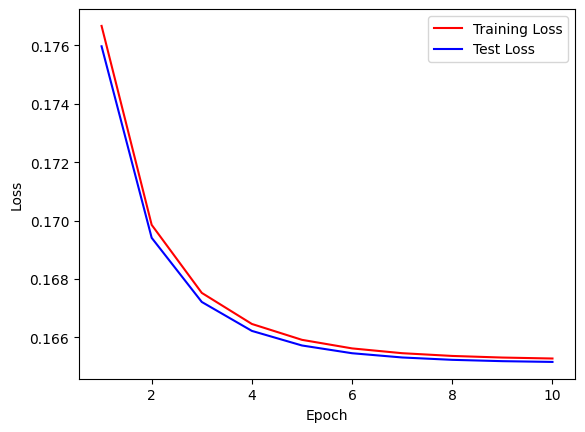

In [19]:
# Visualize loss history
plt.plot(epoch, train_loss, 'r-')
plt.plot(epoch, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [20]:
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.95536
0.95296
